# Corpus analysis regarding the term 'terrorism', ante & post 9/11/2001. 
## The term in question is examined through the speeches of George Bush & Bill Clinton.

#### Preliminary analysis of the corpus preview.
- Here I run two counters combined with regular expressions within the contents of the corpus in order to detect any trends that can determine our focus.
- Indeed we can see that the topic of terrorism was beeing discussed specifically at the year 1996 and then emerging again on the years following the catastrophe.
- The pressidents involved in the debate were predominantly George Bush and Bill Clinton.
- These first results seem prommising, since we specifically want to study the years that the term shifted its context.
- Clarification: the 453 entries within the corpus preview are targeted instances containing the keyword "Terrorism".

The contents of the file that needs to be cleaned: 
 1952	USA	US - NPP	Others -- Rep	... and immoral policy of "containment" which abandons countless human beings to a despotism and godless	terrorism,	which in turn enables the rulers to forge the captives into a weapon for our ...
1967	USA	US - SOU	Johnson	... provide real security to the people living in the countryside. And this means reducing the	terrorism	and the armed attacks which kidnaped and killed 26,900 civilians in the last 32 months, ...
1976	USA	US - PNAS	Carter	... peace is not the m

#*#

Counter({'1996': 73, '2004': 47, '2002': 33, '2001': 30, '1980': 28, '1988': 27, '2008': 27, '2000': 23, '2012': 21, '1984': 20, '1986': 17, '2003': 16, '1995': 15, '1998': 14, '2006': 13, '2005': 12, '1985': 6, '1976': 5, '1994': 5, '1997': 5, '1983': 3, '1992': 3, '1999': 3, '2007': 3, '2010': 3, '1981': 2, '1982': 2, '1987': 2, '1993': 2, '1952': 1, '1967': 1, '1991': 1, '2009': 1, '2013': 1, '2014': 1})

#*#

Counter({'Bush': 116, '

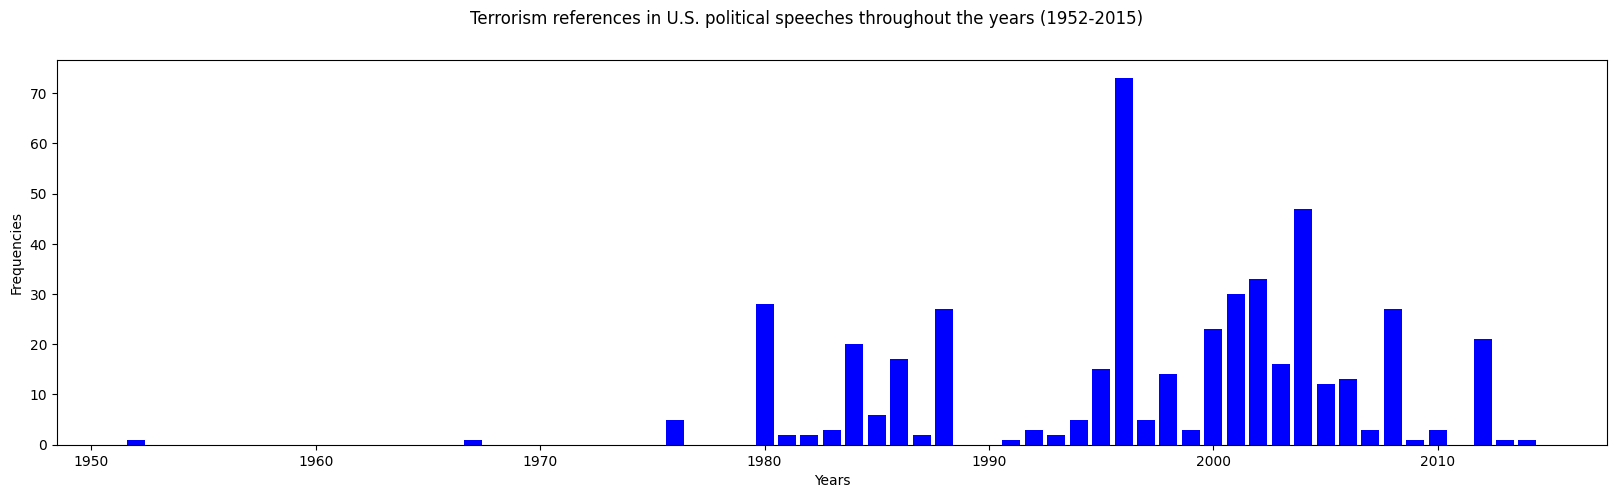


#*#



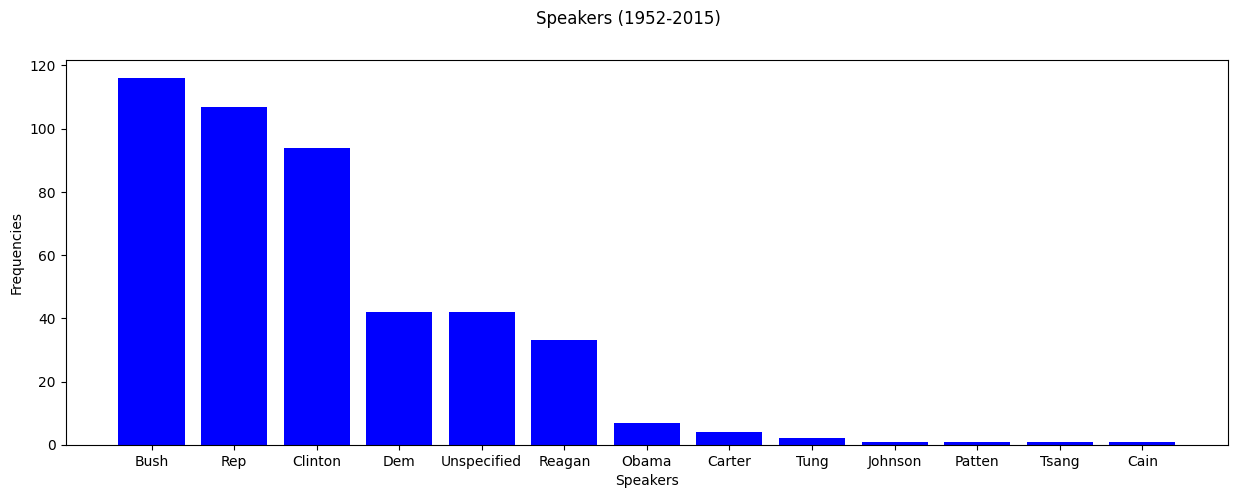

In [1]:
import re
from collections import Counter
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud


with open("pre_view.txt", mode="r", encoding="utf-8") as file:
    preview = file.read()
                                                                    # This is the file's format, i need to keep just the year and the speaker
        
print('The contents of the file that needs to be cleaned:','\n',preview[:500])                     

print('\n'+'#*#'+'\n')

years=[]
for year in re.findall("\\d{4}", preview.strip()):
    years.append(year)
print (str(Counter(years)))

print('\n'+'#*#'+'\n')

yearz=[]                                                            # Here i convert the years (type=str) into integers so they can be sorted out,  
for x in years:                                                     # i need them sorted so i can create a table with their frequencies.
    x=int(x)
    yearz.append(x)

peoples=[]
for people in re.findall("[A-Z][a-z]+\\t\\.", preview.strip()):
    peoples.append(people[:-2])                                     # Clean \t and \. from the names.
print (str(Counter(peoples)))

print('\n'+'#*#'+'\n')
                                                                    # Convert to pandas, in order to visualize frequencies.
series_y = pd.Series(yearz)
word_count_y = series_y.value_counts()
print(word_count_y[:5])

print('\n'+'#*#'+'\n')

series_p = pd.Series(peoples)
word_count_p = series_p.value_counts()
print(word_count_p[:5])

print('\n'+'#*#'+'\n')
                                                                    # Finally visualizing our results in two tables.
plt.figure(figsize = (20, 5)) 
plt.bar(word_count_y.index, word_count_y.tolist(), color="blue")
plt.xticks(rotation=0)
plt.xlabel("Years")
plt.ylabel("Frequencies")
plt.suptitle('''Terrorism references in U.S. political speeches throughout the years (1952-2015)''')
plt.show()

print('\n'+'#*#'+'\n')

plt.figure(figsize = (15, 5)) 
plt.bar(word_count_p.index, word_count_p.tolist(), color="blue")
plt.xticks(rotation=0)
plt.xlabel("Speakers")
plt.ylabel("Frequencies")
plt.suptitle('''Speakers (1952-2015)''')
plt.show()

# Counter({'1996': 72, '2004': 47, '2002': 32, '2001': 29, '1988': 27, '2008': 27, '1980': 26,
#          '2000': 22, '2012': 21, '1984': 20, '1986': 15, '1995': 15, '2003': 15, '1998': 13, '2006': 13,
#          '2005': 12, '1976': 5, '1985': 5, '1994': 5, '1997': 5, '1983': 3, '1992': 3, '1999': 3, '2007': 3,
#          '1981': 2, '1987': 2, '1993': 2, '2010': 2, '1952': 1, '1967': 1, '1982': 1, '1991': 1, '2009': 1, '2013': 1, '2014': 1}) 

# Counter({'Others': 150, 'Bush': 116, 'Rep': 107, 'Clinton': 94, 'Dem': 43, 'Unspecified': 42, 'Reagan': 34, 'Obama': 7,
#          'Carter': 4, 'Tung': 2, 'Johnson': 1, 'Patten': 1, 'Tsang': 1, 'Mc': 1, 'Cain': 1}) 

#### Corpus cleaning and preparation of the material.
- Cleaning the stopwords.
- Uniforming the text.
- Getting the cleaned frequencies.
- Creating three text files with cleaned alphanumerical non-stopwords, that will be used later on.
- Getting the most common lemmas.
- These preliminary frequencies will be used as a refference for the rest of the research project.

In [2]:
import glob
import spacy
nlp = spacy.load("en_core_web_sm")

list_files_bush = glob.glob("bush\\*.txt")                                      # Here we itterate through the first corpus.
                                                 
count1 = 0
for item1 in list_files_bush:                          
    count1+=1
    #print(item)
print("\n"+'#'*35+"\n"+"FILES IN THE CURRENT DIRECTORY:",count1,"\n"+'#'*35)   # Print items so we know we run through the correct directory.

print('\n'+'#*#'+'\n')

remove_stop1=[]                                                                # Create a list of words.
lemmas_1=[]                                                                    # Create a list of lemmas.
for filename1 in list_files_bush:
    with open(filename1, mode="r", encoding="utf-8") as file1:
        texts1 = file1.read()
        texts1 = texts1.lower()
        texts1 = texts1.strip()
        doc1 = nlp(texts1)
        for word1 in doc1:
            if word1.is_alpha and word1.is_stop == False:
                remove_stop1.append(word1.text)
                lemmas_1.append(word1.lemma_)
                
output1 = " ".join(remove_stop1)

with open("non_stop_BUSH.txt", mode="w", encoding="utf-8") as file1:            # Create text file with alphanumerical non-stop words.
    file1.write(output1)

corpus_series1 = pd.Series(remove_stop1)                                        # Convert to pandas and get some frequencies.
corpus_count1 = corpus_series1.value_counts()
print("MOST COMMON WORDS, FOR BUSH'S CORPUS-(RAW FREQUENCIES)")
print(corpus_count1[:10])
print('LEN IS:',len(remove_stop1))

print('\n'+'#*#'+'\n')

list_files_clinton = glob.glob("clinton\\*.txt")                                 # Here we itterate through the second corpus. 
                                                                                # We repeat the same exact code for the rest of the corpus.
count2 = 0
for item2 in list_files_clinton:                          
    count2+=1
    #print(item)
print("\n"+'#'*35+"\n"+"FILES IN THE CURRENT DIRECTORY:",count2,"\n"+'#'*35)

print('\n'+'#*#'+'\n')

remove_stop2=[]
lemmas_2=[]
for filename2 in list_files_clinton:
    with open(filename2, mode="r", encoding="utf-8") as file2:
        texts2 = file2.read()
        texts2 = texts2.lower()
        texts2 = texts2.strip()
        doc2 = nlp(texts2)
        for word2 in doc2:
            if word2.is_alpha and word2.is_stop == False:
                remove_stop2.append(word2.text)
                lemmas_2.append(word2.lemma_)
                
output2 = " ".join(remove_stop2)

with open("non_stop_CLINTON.txt", mode="w", encoding="utf-8") as file2:
    file2.write(output2)

corpus_series2 = pd.Series(remove_stop2)
corpus_count2 = corpus_series2.value_counts()
print("MOST COMMON WORDS, FOR CLINTON'S CORPUS-(RAW FREQUENCIES)")
print(corpus_count2[:10])
print('LEN IS:',len(remove_stop2))

print('\n'+'#*#'+'\n')

deliniation = ['\n\n\n']
remove_stop = remove_stop1 + deliniation + remove_stop2
output = " ".join(remove_stop)
                                                                        # Combine the two previous corpora and create a third file with combined alphanumerical 
with open("non_stop_ALL.txt", mode="w", encoding="utf-8") as file:      # non-stop words. Double checking the frequencies to be sure that there is no error
    file.write(output)                                                  # in the code, such as using the same variable in multiple loops.
                                                                        # Double checking the list lengths, 
corpus_series = pd.Series(remove_stop)
corpus_count = corpus_series.value_counts()
print("MOST COMMON WORDS, FOR COMBINED CORPORA-(RAW FREQUENCIES)")
print(corpus_count[:10])
print('LEN IS:',len(remove_stop))

print('\n'+'#*#'+'\n')

lemmas_series_1 = pd.Series(lemmas_1)                                   # Print the first 10 lemmas for both presidential corpora.
lemmas_series_2 = pd.Series(lemmas_2)      
lemmas_count_1 = lemmas_series_1.value_counts()
lemmas_count_2 = lemmas_series_2.value_counts()

print("MOST COMMON LEMMAS FOR BUSH'S CORPUS")
print(lemmas_count_1[:10])
print('LEN IS:',len(lemmas_count_1))

print('\n'+'#*#'+'\n')

print("MOST COMMON LEMMAS FOR CLINTON'S CORPUS")
print(lemmas_count_2[:10])
print('LEN IS:',len(lemmas_count_2))


###################################
FILES IN THE CURRENT DIRECTORY: 64 
###################################

#*#

MOST COMMON WORDS, FOR BUSH'S CORPUS-(RAW FREQUENCIES)
america       395
people        335
world         255
security      247
new           245
iraq          233
terrorists    188
country       177
american      175
freedom       173
Name: count, dtype: int64
LEN IS: 32825

#*#


###################################
FILES IN THE CURRENT DIRECTORY: 33 
###################################

#*#

MOST COMMON WORDS, FOR CLINTON'S CORPUS-(RAW FREQUENCIES)
people       338
america      278
new          243
world        241
years        204
work         202
american     188
americans    177
children     155
congress     148
Name: count, dtype: int64
LEN IS: 27726

#*#

MOST COMMON WORDS, FOR COMBINED CORPORA-(RAW FREQUENCIES)
people       673
america      673
world        496
new          488
security     375
american     363
work         335
americans    327
congress     315
year

#### NER and POS tagging, analyzing the context.
- I was interested in finding the entities and specific parts of speech arround the chosen keyword.
- Taking a closer look to the context, by keeping only the specific sentences containing "terrorism".

In [3]:
for filename3 in list_files_bush:
    with open(filename3, mode="r", encoding="utf-8") as bush1:
        bushs = bush1.read()
        doc3 = nlp(bushs)
        
        list_gpe_1 = []
        list_org_1 = []
        list_person_1 = []
        list_norp_1 = []
        
        for entity in doc3.ents:
            if entity.label_=="GPE":       
                list_gpe_1.append(entity.text)
            elif entity.label_=="ORG":       
                list_org_1.append(entity.text)
            elif entity.label_ == "PERSON":
                list_person_1.append(entity.text)
            elif entity.label_ == "NORP":
                list_norp_1.append(entity.text)
                
print ("FOR BUSH'S CORPUS:"+"\n")
print ("GPE: "+str(Counter(list_gpe_1).most_common()))
print ("ORG: "+str(Counter(list_org_1).most_common()))
print ("PERSON: "+str(Counter(list_person_1).most_common()))
print ("NORP: "+str(Counter(list_norp_1).most_common()))

print('\n'+'#*#'+'\n')


for filename4 in list_files_clinton:
    with open(filename4, mode="r", encoding="utf-8") as clinton1:
        clintons = clinton1.read()
        doc4 = nlp(clintons)
        
        list_gpe_2 = []
        list_org_2 = []
        list_person_2 = []
        list_norp_2 = []
        
        for entity in doc4.ents:
            if entity.label_=="GPE":       
                list_gpe_2.append(entity.text)
            elif entity.label_=="ORG":       
                list_org_2.append(entity.text)
            elif entity.label_ == "PERSON":
                list_person_2.append(entity.text)
            elif entity.label_ == "NORP":
                list_norp_2.append(entity.text)
                
print ("FOR CLINTON'S CORPUS:"+"\n")             
print ("GPE: "+str(Counter(list_gpe_2).most_common()))
print ("ORG: "+str(Counter(list_org_2).most_common()))
print ("PERSON: "+str(Counter(list_person_2).most_common()))
print ("NORP: "+str(Counter(list_norp_2).most_common()))

FOR BUSH'S CORPUS:

GPE: [('America', 7), ('Poland', 2), ('Warsaw', 1), ('Afghanistan', 1), ('Iraq', 1)]
ORG: [('NATO', 3), ('European Governments', 2), ('Nation', 1), ('Alliance', 1), ('NATO Alliance', 1)]
PERSON: []
NORP: [('Polish', 1), ('Americans', 1), ('European', 1), ('African', 1), ('Palestinian', 1), ('Israeli', 1)]

#*#

FOR CLINTON'S CORPUS:

GPE: [('South Africa', 4), ("South Africa's", 3), ('Bosnia', 3), ('Sarajevo', 2), ('Gorazde', 2), ('America', 1), ('Johannesburg', 1), ('Yugoslavia', 1), ('the United States', 1), ('Croat', 1), ('U.S.', 1), ("North Korea's", 1), ('Iran', 1), ('Soviet Union', 1), ('Russia', 1), ('Latvia', 1), ('Normandy', 1)]
ORG: [('NATO', 6), ('Congress', 3), ('U.N.', 2), ('the White House', 1)]
PERSON: [('Nelson Mandela', 1), ('F.W. de Klerk', 1)]
NORP: [('American', 4), ('Bosnian', 3), ('Serbs', 2), ('Serbian', 1), ('Bosnian Serbs', 1), ('Muslim', 1), ('Russian', 1), ('Latvian', 1)]


PROPN: [('america', 395), ('iraq', 233), ('congress', 166), ('americans', 149), ('united', 138), ('states', 99), ('middle', 83), ('east', 82), ('afghanistan', 78), ('act', 63), ('president', 61), ('american', 60), ('al', 58), ('september', 57), ('world', 56), ('nations', 52), ('senate', 52), ('saddam', 48), ('qaida', 44), ('iraqis', 43), ('hussein', 43), ('europe', 43), ('security', 36), ('israel', 32), ('new', 31), ('house', 28), ('minister', 28), ('prime', 27), ('washington', 27), ('war', 27)]
WORDCLOUD CREATED FROM BUSH'S CORPUS:


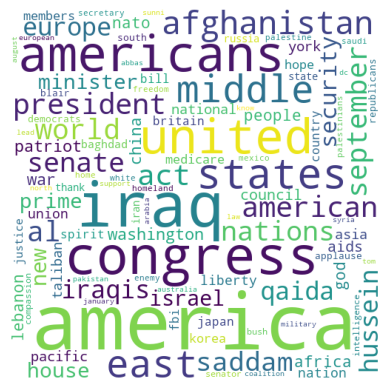


#*#

PROPN: [('america', 278), ('americans', 176), ('congress', 148), ('united', 67), ('states', 65), ('president', 63), ('american', 63), ('world', 51), ('house', 35), ('europe', 31), ('war', 31), ('china', 30), ('washington', 25), ('city', 25), ('senate', 24), ('oklahoma', 24), ('people', 23), ('east', 23), ('bill', 23), ('russia', 23), ('medicare', 21), ('middle', 21), ('iraq', 21), ('nato', 21), ('korea', 20), ('japan', 20), ('hong', 19), ('kong', 19), ('white', 18), ('north', 18)]
WORDCLOUD CREATED FROM CLINTON'S CORPUS:


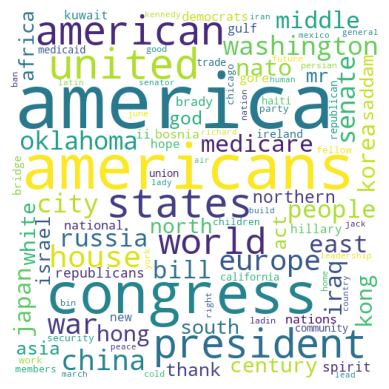

In [4]:
bush_propn = []
with open("non_stop_BUSH.txt", mode="r", encoding="utf-8") as file10:        # Using the text files without the stop-words.
    text10 = file10.read()
    docs10 = nlp(text10)
    for x in docs10:
        if x.pos_ == "PROPN":
            bush_propn.append(x.lemma_)
            
print ("PROPN: "+str(Counter(bush_propn).most_common(30)))

count_b = pd.Series(bush_propn).value_counts()


print("WORDCLOUD CREATED FROM BUSH'S CORPUS:")
wc = WordCloud(background_color="white",width=500,height=500, max_words=100).generate_from_frequencies(count_b)
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud_Bu.png", dpi = 200)
plt.show()       

print('\n'+'#*#'+'\n')  
    
clinton_propn = []
with open("non_stop_CLINTON.txt", mode="r", encoding="utf-8") as file11:
    text11 = file11.read()
    docs11 = nlp(text11)
    for y in docs11:
        if y.pos_ == "PROPN":
            clinton_propn.append(y.lemma_)

            
print ("PROPN: "+str(Counter(clinton_propn).most_common(30)))

count_c = pd.Series(clinton_propn).value_counts()


print("WORDCLOUD CREATED FROM CLINTON'S CORPUS:")
wc = WordCloud(background_color="white",width=500,height=500, max_words=100).generate_from_frequencies(count_c)
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud_Cl.png", dpi = 200)
plt.show()

In [5]:
for filename5 in list_files_bush:
    with open(filename5, mode="r", encoding="utf-8") as bush1:
        bushs = bush1.read()
        bush_sentences = []
        doc5 = nlp(bushs, disable = ["lemmatizer", "tagger"])
        for token1 in doc5:
            if token1.text == "terrorism":
                bush_sentences.append(token1.sent.text)
                
        bush_sents = " ".join(bush_sentences)
        
        #print(bush_sentences)
        print(bush_sents)

print('\n'+'#*#'+'\n')
print('\n'+'#*#'+'\n')
        
for filename6 in list_files_clinton:
    with open(filename6, mode="r", encoding="utf-8") as clinton1:
        clintons = clinton1.read()
        doc6 = nlp(clintons, disable = ["lemmatizer", "tagger"])
        clinton_sentences = []
        for token2 in doc6:
            if token2.text == "terrorism":
                clinton_sentences.append(token2.sent.text)
        
        clinton_sents = " ".join(clinton_sentences)
        
        #print(clinton_sentences)
        print(clinton_sents)                                           # the selection created bellow is very important for our analysis, returning the immediate context of the keyword.

Across the world, we are meeting the threat of terrorism to make the world safer and confronting the grave dangers posed by outlaw regimes.
They had vanquished a brutal dictator who had twice invaded neighboring countries, who had used weapons of mass destruction against his own people, and who had supported and financed terrorism.
My plan extends unemployment compensation by 13 weeks in the States hardest hit by terrorism.
We've created a new department of Government to defend our homeland, focused the FBI on preventing terrorism, begun to reform our intelligence agencies, broken up terror cells across the country, expanded research on defenses against biological and chemical attack, improved border security, and trained more than a half million first-responders.
This election will also determine how America responds to the continuing danger of terrorism, and you know where I stand.
In Afghanistan, Iraq, and elsewhere, they are fighting terrorists that threaten America and helping to 

WORDCLOUD CREATED FROM BUSH'S CORPUS:


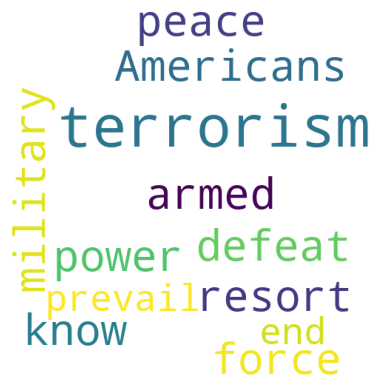


#*#

WORDCLOUD CREATED FROM CLINTON'S CORPUS:


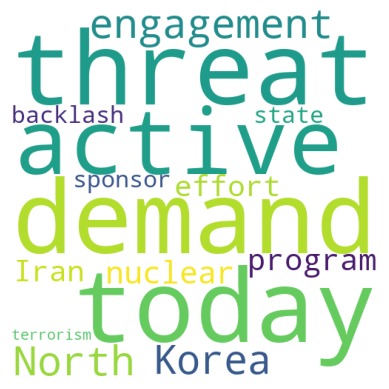

In [6]:
list_words_bush = []

doc10 = nlp(bush_sents)
for token_1 in doc10:
    if (token_1.is_stop == False) and (token_1.is_alpha):
        list_words_bush.append(token_1.lemma_)
        
#print(list_words_bush[0:5])
count_1 = pd.Series(list_words_bush).value_counts()


print("WORDCLOUD CREATED FROM BUSH'S CORPUS:")
wc = WordCloud(background_color="white",width=500,height=500, max_words=100).generate_from_frequencies(count_1)
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud_B.png", dpi = 200)
plt.show()

print('\n'+'#*#'+'\n')

list_words_clinton = []

doc11 = nlp(clinton_sents)
for token_2 in doc11:
    if (token_2.is_stop == False) and (token_2.is_alpha):
        list_words_clinton.append(token_2.lemma_)
        
#print(list_words_clinton[0:5])
count_2 = pd.Series(list_words_clinton).value_counts()


print("WORDCLOUD CREATED FROM CLINTON'S CORPUS:")
wc = WordCloud(background_color="white",width=500,height=500, max_words=100).generate_from_frequencies(count_2)
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud_C.png", dpi = 200)
plt.show()
